<a href="https://colab.research.google.com/github/ValentynaGrach/ml-homeworks/blob/main/%D0%94%D0%97_9_Clustering_ValentynaGrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1️⃣ завантаження та первиний аналіз датасету South German Credit

In [ ]:
from google.colab import files, data_table
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from tabulate import tabulate

In [ ]:
# Виберіть та завантажте файл
uploaded = files.upload()

# Отримуємо ім'я завантаженого файлу
zip_filename = list(uploaded.keys())[0]
print("Завантажений файл:", zip_filename)

Saving south+german+credit+update.zip to south+german+credit+update.zip
Завантажений файл: south+german+credit+update.zip


In [ ]:
# Вказуємо шлях до розпакування
extract_path = "/content/south_german_credit"
os.makedirs(extract_path, exist_ok=True)

# Розпаковуємо ZIP-архів
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Виводимо список файлів у папці
print("Вміст папки після розпакування:")
os.listdir(extract_path)

Вміст папки після розпакування:


['read_SouthGermanCredit.R', 'SouthGermanCredit.asc', 'codetable.txt']

In [ ]:
# 1️⃣ Завантаження даних
file_path = "/content/south_german_credit/SouthGermanCredit.asc"

# Завантажуємо датасет (пробіли як роздільники)
sgc = pd.read_csv(file_path, sep=r'\s+')

# Виведемо результат датасету
display(sgc.head(10))

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


##🔹 → первинний аналіз даних

In [ ]:
# 2️⃣
# Перевірка на пропуски та форматів стовпців
print("\n🔍 Перевірка на пропуски та формати стовпців в sgc:")
print(sgc.info())

# Огляд статистичних характеристик
print("\n📊 Статистичні характеристики для sgc:")
display(sgc.describe())

# перевірка на дублікати
duplicates = sgc.duplicated().sum()
print("\n🔍 Кількість дублікатів:", duplicates)

# перевірка унікальних значень в кожній колонці (щоб знайти "?" або текст у числових колонках)
print("\n🔍🔹 Унікальні значення в колонках (перші 10):")
for col in sgc.columns:
    print("\nКолонка", col, ":", sgc[col].unique()[:10])


🔍 Перевірка на пропуски та формати стовпців в sgc:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000



🔍 Кількість дублікатів: 0

🔍🔹 Унікальні значення в колонках (перші 10):

Колонка laufkont : [1 2 4 3]

Колонка laufzeit : [18  9 12 10  8  6 24 11 30 48]

Колонка moral : [4 2 3 0 1]

Колонка verw : [ 2  0  9  3  1 10  5  4  6  8]

Колонка hoehe : [1049 2799  841 2122 2171 2241 3398 1361 1098 3758]

Колонка sparkont : [1 2 3 5 4]

Колонка beszeit : [2 3 4 1 5]

Колонка rate : [4 2 3 1]

Колонка famges : [2 3 4 1]

Колонка buerge : [1 3 2]

Колонка wohnzeit : [4 2 3 1]

Колонка verm : [2 1 3 4]

Колонка alter : [21 36 23 39 38 48 40 65 24 31]

Колонка weitkred : [3 1 2]

Колонка wohn : [1 2 3]

Колонка bishkred : [1 2 3 4]

Колонка beruf : [3 2 1 4]

Колонка pers : [2 1]

Колонка telef : [1 2]

Колонка gastarb : [2 1]

Колонка kredit : [1 0]


🔹 **Аналіз отриманих результатів**
✅ **Розмір**: 1000 записів, 21 колонка.  
✅ **Відсутність пропусків**: усі колонки мають 1000 значень, тобто **немає NaN**.  
✅ **Дублікатів немає**: нам **не потрібно їх обробляти**.  
✅ **Типи змінних**:
   - **Усі змінні мають тип `int64`**, що означає, що категоріальні змінні вже представлені у числовому форматі.
   - **Числові змінні**: `laufzeit (duration)`, `hoehe (amount)`, `alter (age)`.
   - **Категоріальні змінні (кодування числом)**: усі інші.  
✅ **Цільова змінна** `credit_risk (kredit)` вже закодована як `0` (поганий кредит) і `1` (хороший).  
---

In [ ]:
# 3️⃣ Перейменування колонок
sgc.rename(columns={
    "laufkont": "status",
    "laufzeit": "duration",
    "moral": "credit_history",
    "verw": "purpose",
    "hoehe": "amount",
    "sparkont": "savings",
    "beszeit": "employment_duration",
    "rate": "installment_rate",
    "famges": "personal_status_sex",
    "buerge": "other_debtors",
    "wohnzeit": "present_residence",
    "verm": "property",
    "alter": "age",
    "weitkred": "other_installment_plans",
    "wohn": "housing",
    "bishkred": "number_credits",
    "beruf": "job",
    "pers": "people_liable",
    "telef": "telephone",
    "gastarb": "foreign_worker",
    "kredit": "credit_risk"
}, inplace=True)

print("\n✅ Колонки перейменовано! Оновлений датасет:")
display(sgc.head(10))


✅ Колонки перейменовано! Оновлений датасет:


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
5,1,10,4,0,2241,1,2,1,3,1,...,1,48,3,1,2,2,1,1,1,1
6,1,8,4,0,3398,1,4,1,3,1,...,1,39,3,2,2,2,2,1,1,1
7,1,6,4,0,1361,1,2,2,3,1,...,1,40,3,2,1,2,1,1,1,1
8,4,18,4,3,1098,1,1,4,2,1,...,3,65,3,2,2,1,2,1,2,1
9,2,24,2,3,3758,3,1,1,2,1,...,4,23,3,1,1,1,2,1,2,1


In [ ]:
# ✅ Фінальний вивід
print("\n📌 Фінальна структура даних:")
sgc.info()
print("\n✅ Дані готові для подальшої роботи!")


📌 Фінальна структура даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  100

##🔹 → графічний аналіз даних

Щоб зрозуміти структуру даних та розподіл змінних, побудуємо:

*   📉 Кореляційну матрицю (heatmap)  
*   📊 Гістограми (histplot) для числових змінних
*   🔵 Крапкові графіки (stripplot) для порівняння змінних

---








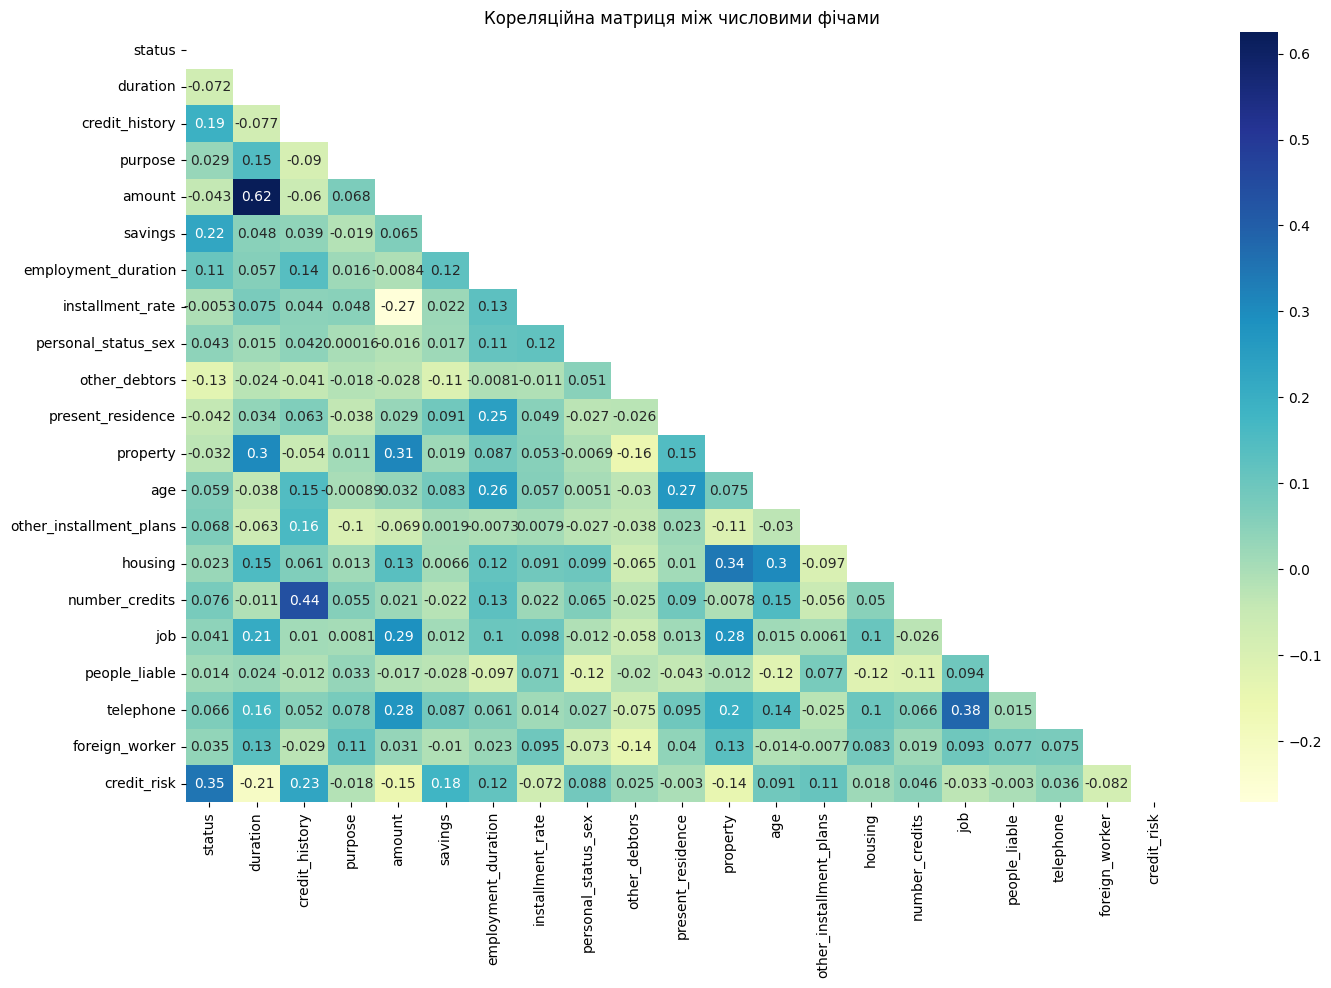

In [ ]:
# 📌 1️⃣ Кореляційна матриця
corr_matrix = sgc.select_dtypes(include=['float64', 'int64']).corr()

# Візуалізація кореляційної матриці heatmap
plt.figure(figsize=(16, 10))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":10}, mask=mask)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Кореляційна матриця між числовими фічами")
plt.show()

---

🔹 **Оновлений аналіз кореляційної матриці**  

✅ **Кореляція `credit_risk` (цільова змінна) з іншими змінними**:  
1️⃣ **`status` (~ 0.35)** – чим **кращий статус рахунку**, тим **менший ризик**.  
2️⃣ **`duration` (~ -0.21)** – **чим довший кредит**, тим **вищий ризик**.  
3️⃣ **`savings` (~ 0.18)** – більше **заощаджень** = **менший ризик**.  
4️⃣ **`amount` (~ -0.15)** – **чим більша сума кредиту**, тим **вищий ризик**.  
5️⃣ **`installment_rate` (~ -0.072)** – слабка кореляція, **більший відсоток виплат = трохи вищий ризик**.  

💡 **Висновок:**  
Ключові фактори ризику: **статус рахунку, тривалість кредиту, заощадження, сума кредиту**.  

---

✅ **Сильні кореляції між ознаками (впливають одна на одну)**:  
1️⃣ **`amount` та `duration` (~ 0.62)** – **більша сума кредиту → довший термін кредиту**.  
2️⃣ **`amount` та `property` (~ 0.31)** – **люди, які мають власність, можуть брати більші кредити**.  
3️⃣ **`job` та `amount` (~ 0.29)** – **тип роботи впливає на суму кредиту**.  
4️⃣ **`number_credits` та `credit_history` (~ 0.44)** – **більше кредитів = краща кредитна історія**.  

💡 **Висновок:**  
Ці ознаки можна використовувати для **нових фіч**.

---

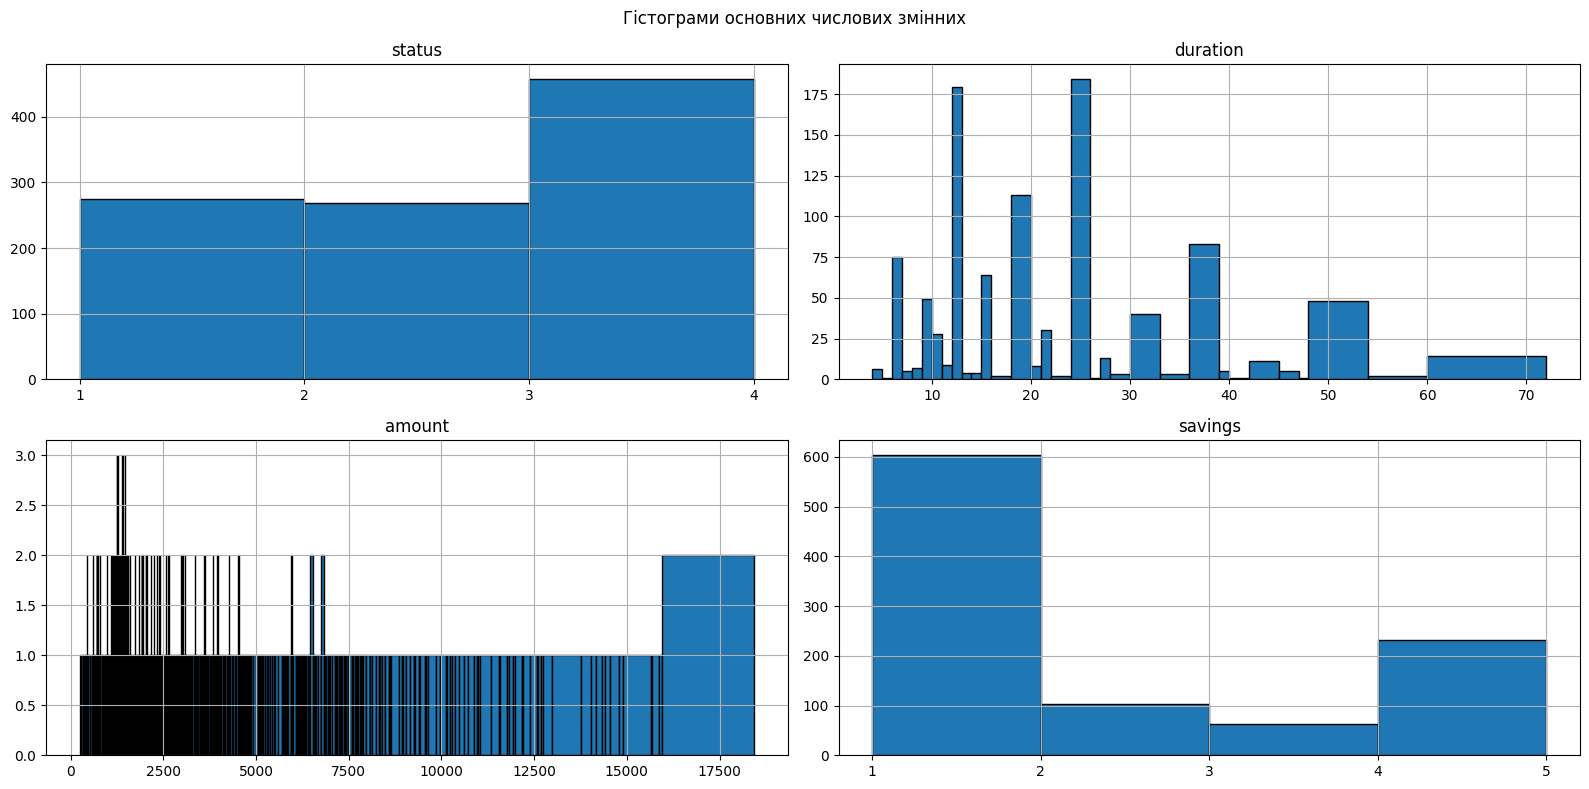

In [ ]:
# 📌 2️⃣ Гістограми для числових змінних
numerical_cols = ["status", "duration", "amount", "savings"]
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

for i, col in enumerate(numerical_cols):
    ax = axes[i//2, i%2]
    sgc[col].hist(ax=ax, bins=sorted(sgc[col].unique()), edgecolor="black")
    ax.set_title(col)
    if col in ["status", "savings"]:
        ax.set_xticks(sorted(sgc[col].unique()))

plt.suptitle("Гістограми основних числових змінних")
plt.tight_layout()
plt.show()

**Висновок:**  
Графік показує **дискретність** `status` і `savings`, **нерівномірний розподіл** `duration` та **великий розкид** `amount`. Це вказує на **необхідність масштабування** перед кластеризацією.

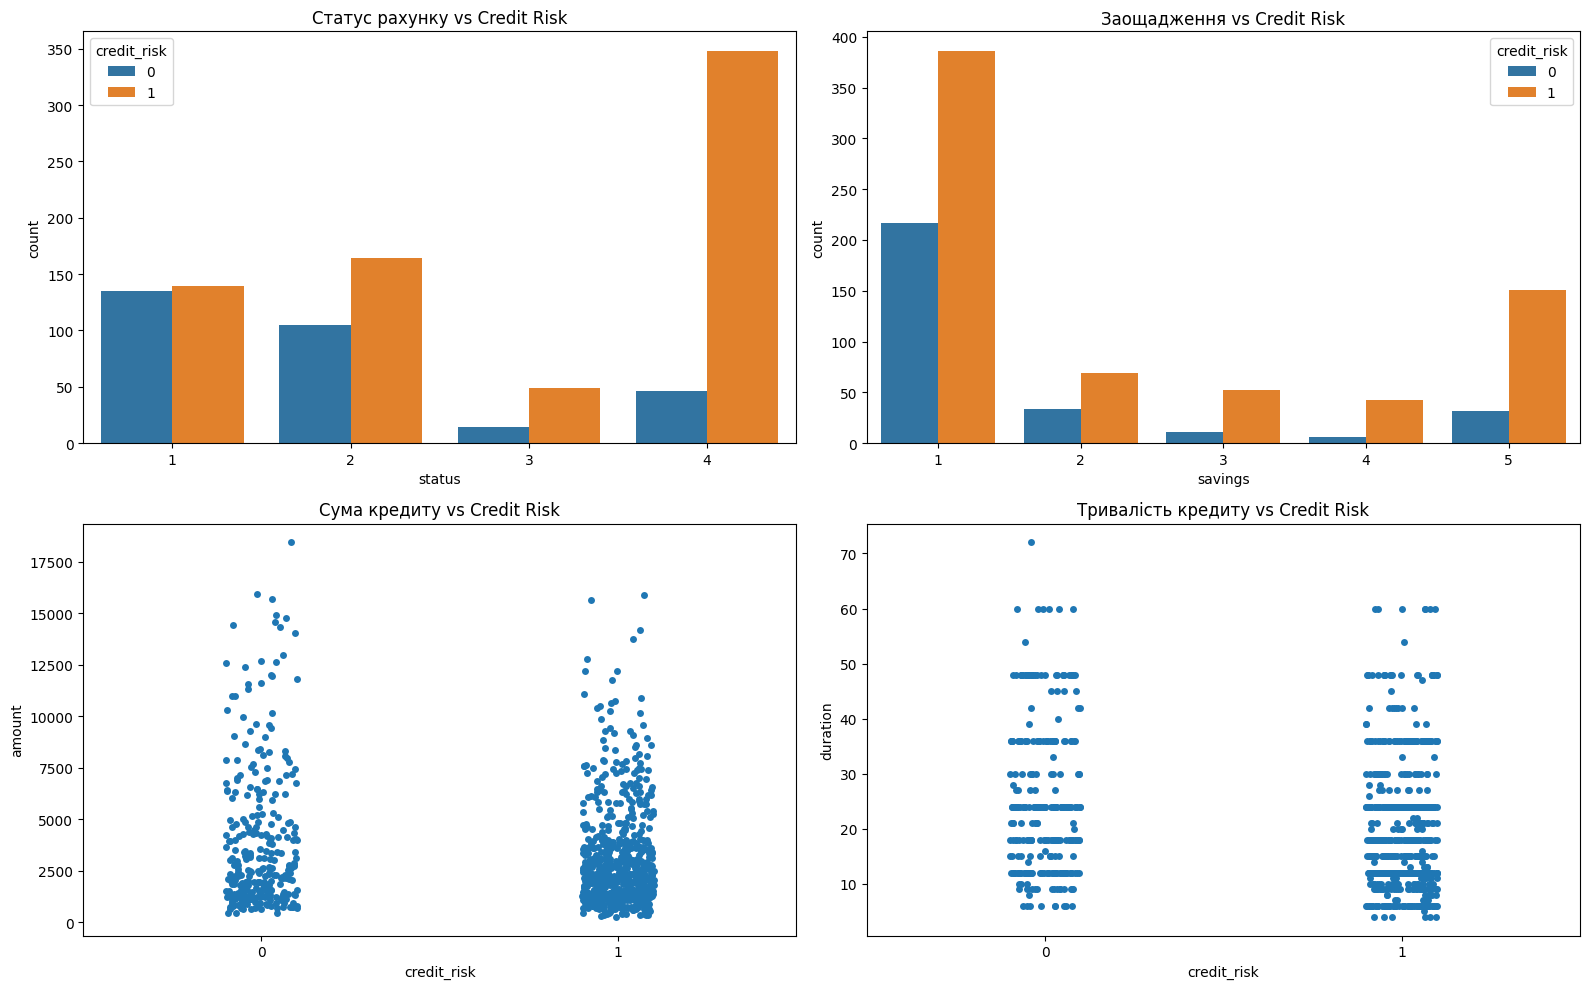

In [ ]:
# 📌 3️⃣ Countplot і stripplot для порівняння числових змінних з кредитним ризиком
plt.figure(figsize=(16, 10))

# `countplot` для категоріальних змінних
plt.subplot(2, 2, 1)
sns.countplot(x="status", hue="credit_risk", data=sgc)
plt.title("Статус рахунку vs Credit Risk")

plt.subplot(2, 2, 2)
sns.countplot(x="savings", hue="credit_risk", data=sgc)
plt.title("Заощадження vs Credit Risk")

# `boxplot` для числових змінних
plt.subplot(2, 2, 3)
sns.stripplot(x="credit_risk", y="amount", data=sgc)
plt.title("Сума кредиту vs Credit Risk")

plt.subplot(2, 2, 4)
sns.stripplot(x="credit_risk", y="duration", data=sgc)
plt.title("Тривалість кредиту vs Credit Risk")

plt.tight_layout()
plt.show()

---
✅ Висновок:  
🔹 Клієнти зі статусом рахунку `4` та високими заощадженнями (**`savings = 5`**) частіше мають низький кредитний ризик.  
🔹 Клієнти зі статусом `1` та низькими заощадженнями (**`savings = 1`**) переважно мають високий ризик.  
🔹 Розмір кредиту (`amount`) і його тривалість (`duration`) не дають чіткої межі ризику, але більші значення частіше зустрічаються у ризикових кредитах.  

---
#2️⃣ **нові фічі (Feature Engineering)**  
1️⃣ **financial_stability** – якщо клієнт має **високий статус рахунку (≥ 3) та значні заощадження (≥ 3)** → **низький ризик**.  
2️⃣ **high_risk_loan** – якщо кредит має **велику суму (≥ 5000) або довгий термін (≥ 36 місяців)** → **високий ризик**.  
3️⃣ **low_income_suspect** – якщо клієнт має **низький статус рахунку (1) та мінімальні заощадження (1)** → **можливі фінансові труднощі**.  

---

In [ ]:
# 📌 1️⃣ Ознака фінансової стабільності
sgc["financial_stability"] = ((sgc["status"] >= 3) & (sgc["savings"] >= 3)).astype(int)

# 📌 2️⃣ Ознака ризикового кредиту
sgc["high_risk_loan"] = ((sgc["amount"] >= 5000) | (sgc["duration"] >= 36)).astype(int)

# 📌 3️⃣ Ознака можливих фінансових труднощів
sgc["low_income_suspect"] = ((sgc["status"] == 1) & (sgc["savings"] == 1)).astype(int)

# ✅ Перевіряємо нові ознаки
print("\n✅ Нові фічі створені! Оновлений DataFrame:")
display(sgc[["financial_stability", "high_risk_loan", "low_income_suspect"]].head(10))


✅ Нові фічі створені! Оновлений DataFrame:


,financial_stability,high_risk_loan,low_income_suspect
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,0
9,0,0,0


📊 ✔ Перевірити кореляцію з credit_risk

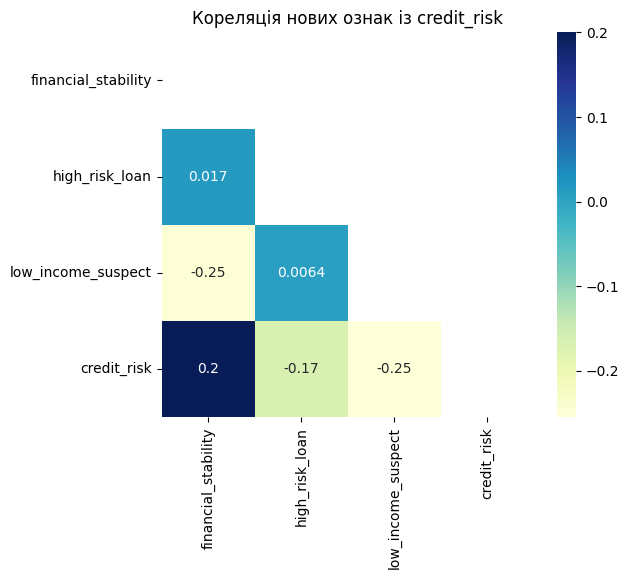

In [ ]:
# Кореляційна матриця для нових ознак і цільової змінної
correlation_features = ["financial_stability", "high_risk_loan", "low_income_suspect", "credit_risk"]
corr_matrix = sgc[correlation_features].corr()

# Візуалізація heatmap
plt.figure(figsize=(6, 5))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":10}, mask=mask)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Кореляція нових ознак із credit_risk")
plt.show()

✅ **Висновок з кореляційної матриці нових фіч**  

🔹 **`financial_stability`** має **позитивний зв’язок із `credit_risk` (0.2)** → стабільні клієнти частіше мають хороший кредитний ризик.  
🔹 **`low_income_suspect`** має **негативний зв’язок із `credit_risk` (-0.25)** → клієнти з низькими доходами частіше мають високий ризик.  
🔹 **`high_risk_loan`** має слабку кореляцію (-0.17) → велика сума чи довгий термін не є основним фактором ризику.  

🚀 Далі – `t-SNE` для зменшення розмірності та аналізу кластерів!

# 3️⃣ **t-SNE**

## масштабування даних

In [ ]:
# 📌 Вибираємо числові ознаки для масштабування (всі, крім credit_risk)
features = sgc.drop(columns=["credit_risk"])

# 📌 Масштабуємо дані
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# 📌 Виводимо перші 5 рядків масштабованих даних
print("✅ Масштабовані дані (перші 5 рядків):")
display(scaled_df.head())

# 📌 Виводимо статистику після масштабування
print("\n📊 Статистичні характеристики після масштабування:")
display(scaled_df.describe().T)

✅ Масштабовані дані (перші 5 рядків):


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,financial_stability,high_risk_loan,low_income_suspect
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,...,0.460831,-1.751205,-0.704926,0.146949,0.428290,-0.823318,0.196014,-0.470108,-0.585049,1.888441
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,...,0.460831,-1.751205,1.027079,0.146949,-2.334869,-0.823318,0.196014,-0.470108,-0.585049,1.888441
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,...,0.460831,-1.751205,-0.704926,-1.383771,0.428290,-0.823318,0.196014,-0.470108,-0.585049,-0.529537
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,...,0.460831,-1.751205,1.027079,-1.383771,-2.334869,-0.823318,-5.101669,-0.470108,-0.585049,1.888441
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,...,-2.375050,0.135869,1.027079,-1.383771,0.428290,-0.823318,-5.101669,-0.470108,-0.585049,1.888441



📊 Статистичні характеристики після масштабування:


,count,mean,std,min,25%,50%,75%,max
status,1000.0,0.000000e+00,1.0005,-1.254566,-1.254566,-0.459026,1.132053,1.132053
duration,1000.0,1.136868e-16,1.0005,-1.402415,-0.738668,-0.240857,0.256953,4.239436
credit_history,1000.0,-2.842171e-17,1.0005,-2.350870,-0.503428,-0.503428,1.344014,1.344014
purpose,1000.0,8.082424e-17,1.0005,-1.030963,-0.666407,-0.301852,0.062704,2.614592
amount,1000.0,0.000000e+00,1.0005,-1.070856,-0.675476,-0.337339,0.248464,5.370764
savings,1000.0,-5.684342e-17,1.0005,-0.699707,-0.699707,-0.699707,0.566731,1.833169
employment_duration,1000.0,9.947598e-17,1.0005,-1.973997,-0.317959,-0.317959,1.338078,1.338078
installment_rate,1000.0,9.947598e-17,1.0005,-1.764514,-0.870183,0.024147,0.918477,0.918477
personal_status_sex,1000.0,8.881784e-17,1.0005,-2.376626,-0.963650,0.449326,0.449326,1.862303
other_debtors,1000.0,-5.684342e-17,1.0005,-0.303686,-0.303686,-0.303686,-0.303686,3.885083


## t-SNE для візуалізації в 2D

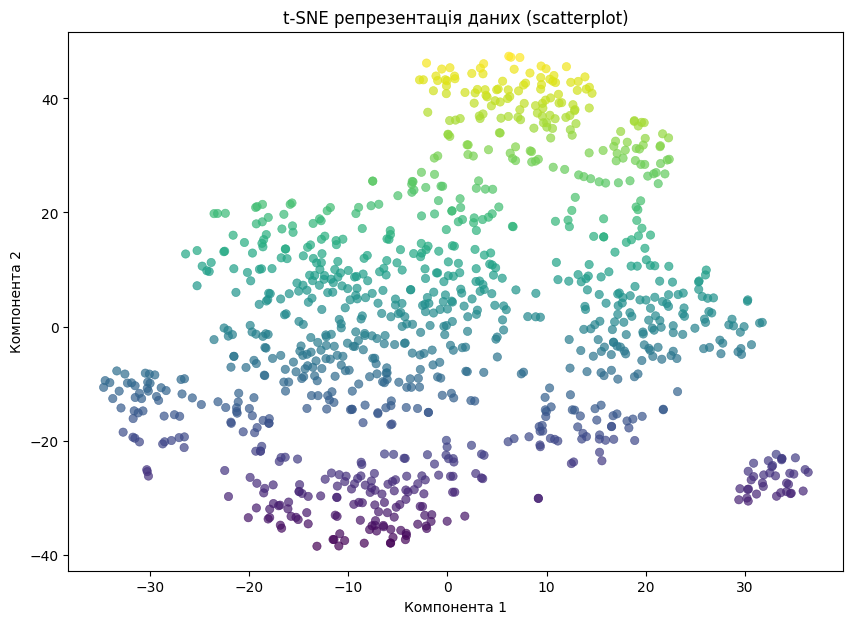

In [ ]:
# 📌 Ініціалізація t-SNE з параметром perplexity=30
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# 📌 Візуалізація t-SNE з кольоровими точками
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=tsne_results[:, 1], palette="viridis", alpha=0.7, edgecolor=None)
plt.title("t-SNE репрезентація даних (scatterplot)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.legend([],[], frameon=False)
plt.show()

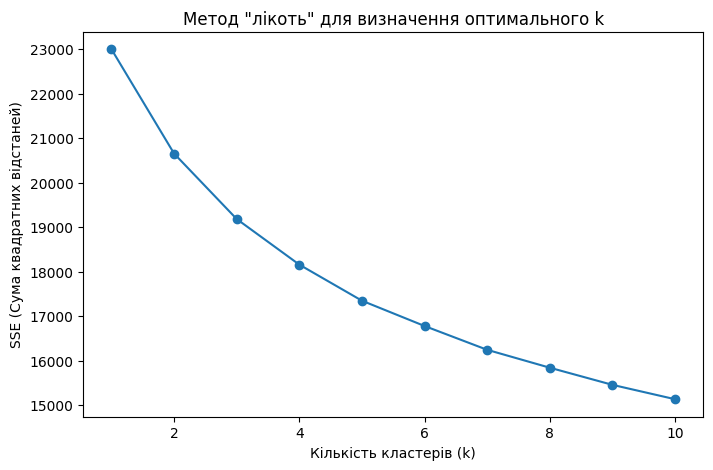

In [ ]:
# 📌 Визначаємо оптимальну кількість кластерів методом ліктя
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# 📌 Візуалізація методу ліктя
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Метод "лікоть" для визначення оптимального k')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('SSE (Сума квадратних відстаней)')
plt.show()

✅ **Аналіз результату методу ліктя**  

🔹 Графік показує, що **спад SSE сповільнюється після певного значення `k`**.  
🔹 **Точка "згину"** вказує на **оптимальну кількість кластерів**.  
🔹 Орієнтовно **оптимальне `k` = 3 або 4** (але потрібно перевірити).  

---

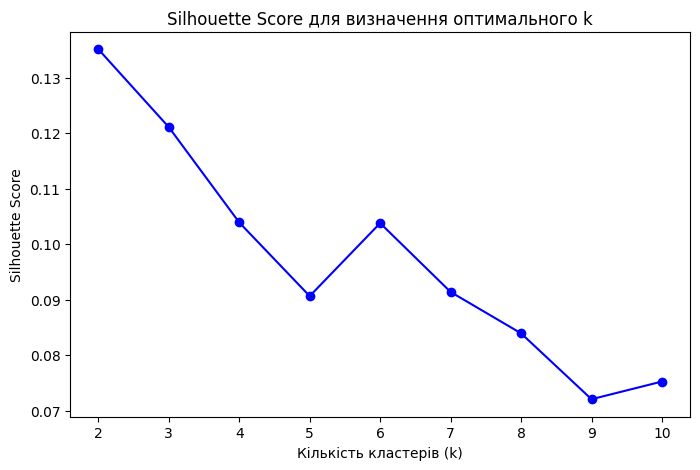

In [ ]:
# 📌 Перевіряємо значення Silhouette Score для k від 2 до 10
silhouette_scores = []
k_range = range(2, 11)  # Від 2, бо для k=1 силуетний коефіцієнт не визначається

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# 📌 Візуалізація результатів
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker="o", linestyle="-", color="b")
plt.xlabel("Кількість кластерів (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score для визначення оптимального k")
plt.show()

✅ **Аналіз Silhouette Score**  

🔹 Найвище значення **Silhouette Score** отримуємо при **k = 2**.  
🔹 Значення **поступово зменшується** зі збільшенням `k`.  
🔹 `k = 6` показує невеликий пік, але значення значно нижче, ніж при `k = 2`.  

📌 **Остаточний вибір:**  
✅ Оптимальне `k = 2` (оскільки дає найкращий силуетний коефіцієнт).  

---

## кластеризація (KMeans і DBSCAN)

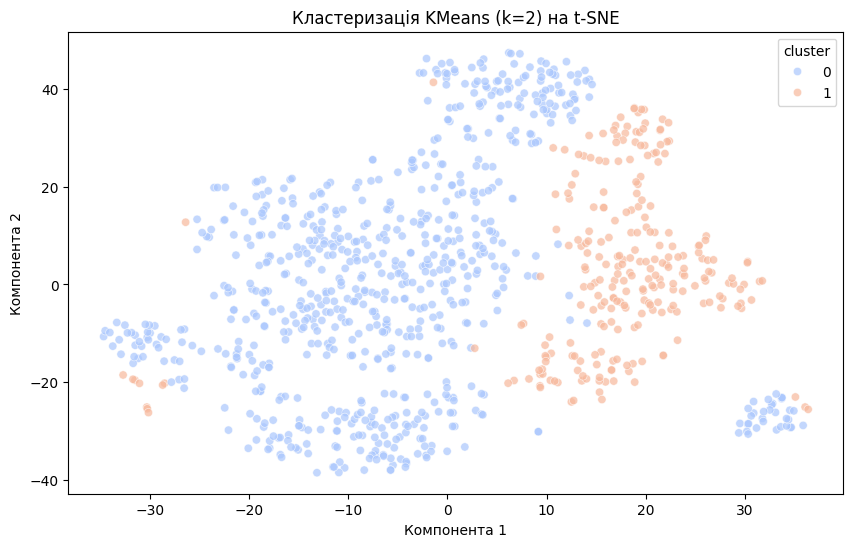

In [ ]:
# 📌 Кластеризація KMeans з обраним k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
sgc["cluster"] = kmeans.fit_predict(scaled_features)

# 📌 Візуалізація кластерів на t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=sgc["cluster"], palette="coolwarm", alpha=0.7)
plt.title("Кластеризація KMeans (k=2) на t-SNE")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()

✅ **Аналіз результатів кластеризації KMeans (k=2)**  

🔹 Дві чітко розділені групи точок (кластери `0` та `1`).  
🔹 Кластери мають **логічний розподіл**, що підтверджує правильність вибору `k=2`.  
🔹 Точки кожного кластера розташовані досить щільно, **що вказує на добре згруповані об'єкти**.  

---

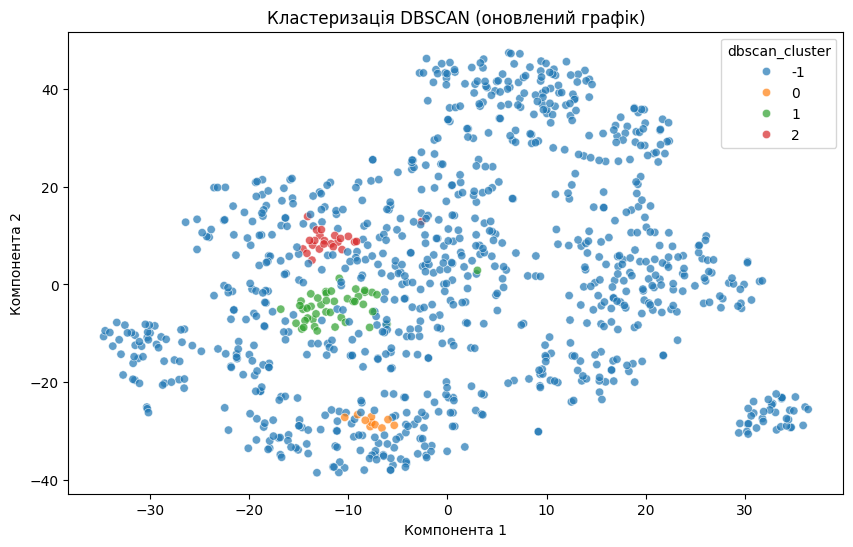

In [ ]:
# 📌 Налаштовуємо параметри DBSCAN (eps - радіус, min_samples - мінімум точок для кластера)
dbscan = DBSCAN(eps=2.5, min_samples=10)
sgc["dbscan_cluster"] = dbscan.fit_predict(scaled_features)

# 📌 Візуалізація кластерів DBSCAN (з кольорами)
plt.figure(figsize=(10, 6))
unique_clusters = np.unique(sgc["dbscan_cluster"])
palette = sns.color_palette("tab10", len(unique_clusters))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=sgc["dbscan_cluster"], palette=palette, alpha=0.7)
plt.title("Кластеризація DBSCAN (оновлений графік)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()

✅ **Аналіз результатів DBSCAN**  

🔹 DBSCAN виділив **3 реальні кластери** (0, 1, 2) + **шумові точки (-1)**.  
🔹 **Більшість точок потрапили до шуму** (синій колір), тобто алгоритм не розпізнав чіткі кластери для них.  
🔹 DBSCAN знайшов **невеликі щільні групи** (зелені, червоні, оранжеві точки).  

---

📌 **Що це означає?**  
✅ DBSCAN корисний для пошуку локальних щільних угруповань**.  
✅ Але в цьому випадку він не знайшов великої кількості чітких кластерів.  
✅ **KMeans** працює краще, бо дані **відносно рівномірно розподілені**.  

---

📌 **Фінальне рішення:**  
🚀 Ми залишаємо KMeans (k=2) як основний метод кластеризації!  
🔹 DBSCAN можна згадати у висновках, але він не підходить для цих даних.  

---

## аналіз кластерів

✅ **Фінальний аналіз кластерів KMeans (k=2)**  

📌 **Що зараз робимо?**  
🔹 Порівнюємо **середні значення змінних у кожному кластері**.  
🔹 Визначаємо, **чим відрізняються кластери** (наприклад, фінансовий стан, розмір кредиту тощо).  
🔹 Робимо **остаточні висновки про поділ клієнтів**.  

In [ ]:
# 📌 Групуємо дані за кластерами та обчислюємо середні значення
cluster_summary = sgc.groupby("cluster").mean()

# 📌 Відображаємо результат
print(tabulate(cluster_summary, headers='keys', tablefmt='grid'))

+-----------+----------+------------+------------------+-----------+----------+-----------+-----------------------+--------------------+-----------------------+-----------------+---------------------+------------+---------+---------------------------+-----------+------------------+---------+-----------------+-------------+------------------+---------------+-----------------------+------------------+----------------------+------------------+
|   cluster |   status |   duration |   credit_history |   purpose |   amount |   savings |   employment_duration |   installment_rate |   personal_status_sex |   other_debtors |   present_residence |   property |     age |   other_installment_plans |   housing |   number_credits |     job |   people_liable |   telephone |   foreign_worker |   credit_risk |   financial_stability |   high_risk_loan |   low_income_suspect |   dbscan_cluster |
+===========+==========+============+==================+===========+==========+===========+===================

### ✅ **Фінальний аналіз кластерів KMeans (k=2)**  

🔹 **Основні відмінності між кластерами**  

1️⃣ **Кластер 0 (Малий кредит, низький ризик)**  
   - Менша **тривалість кредиту** (~16 місяців).  
   - Менша **сума кредиту** (~2040).  
   - Вища частка **"фінансово стабільних" клієнтів**.  
   - Нижча частка клієнтів з **високоризиковими кредитами**.  
   - Вища частка клієнтів з **низьким рівнем доходу**.  

2️⃣ **Кластер 1 (Великий кредит, потенційно ризикований)**  
   - Вища **тривалість кредиту** (~36 місяців).  
   - Значно **вища сума кредиту** (~6905).  
   - Вища ймовірність **потенційного фінансового ризику**.  
   - Більше клієнтів з **високоризиковими кредитами**.  

📌 **Фінальний висновок**  
🔹 **Кластер 0** виглядає **безпечнішим** – тут переважають клієнти з короткими кредитами та меншими сумами.  
🔹 **Кластер 1** має **вищий фінансовий ризик** через великі кредити та довшу їхню тривалість.  